In [8]:
from data.data import *
from src.orcml import *
from src.plotting import *
from src.utils.graph_utils import *
from src.metric_fa.metric_fa import MetricFA
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
n_points = 2500
noise = 6.2
noise_thresh = 2.2

exp_params = {
    'dataset': '3D_swiss_roll',
    'mode': 'nbrs',
    'n_neighbors': 15,
    'epsilon': None,
    'lda': 0.01,
    'delta': 0.8
}

dataset_info = {
    'name': '3D_swiss_roll',
    'n_points': n_points,
    'noise': noise,
    'noise_thresh': noise_thresh
}

return_dict = swiss_roll(n_points=n_points, noise=noise, noise_thresh=noise_thresh, supersample=True, dim=3, hole=False)
swiss_roll_data, color, cluster, swiss_roll_supersample, subsample_indices = return_dict['data'], return_dict['color'], return_dict['cluster'], return_dict['data_supersample'], return_dict['subsample_indices']

In [10]:
orcmanl = ORCManL(
    exp_params=exp_params,
    verbose=True,
    reattach=True
)
orcmanl.fit(swiss_roll_data)

Number of candidate edges: 4102, Number of edges in G': 22053
Shortcut Edge Detected: edge 171
 d_G'(x,y)/effective_eps: 17.576821894148992
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 172
 d_G'(x,y)/effective_eps: 17.135053769420615
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 193
 d_G'(x,y)/effective_eps: 23.135154837276744
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 196
 d_G'(x,y)/effective_eps: 22.84711270490404
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 197
 d_G'(x,y)/effective_eps: 23.008342658838604
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 237
 d_G'(x,y)/effective_eps: 23.320973636209917
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 252
 d_G'(x,y)/effective_eps: 26.77829935950086
 Threshold/effective_eps: 9.97239158264089


Shortcut Edge Detected: edge 257
 d_G'(x,y)/effective_eps: 23.182580890275688
 

In [11]:
%autoreload 2
G_orcmanl = orcmanl.get_pruned_graph()

In [12]:
%autoreload 2
metricfa = MetricFA(verbose=True, dim=2)
pos = metricfa.forceatlas2_networkx_layout(G_orcmanl, pos=None, iterations=3)

100%|██████████| 3/3 [00:03<00:00,  1.10s/it]

BarnesHut Approximation  took  0.29  seconds
Repulsion forces  took  2.75  seconds
Gravitational forces  took  0.03  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.08  seconds


/home/tristan/envs/isorc/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


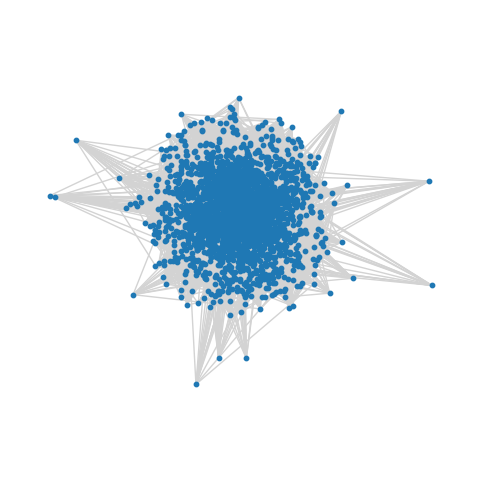

In [13]:
# plot graph
plot_graph_2D(pos, G_orcmanl, title=None)

In [14]:
import fa2

forceatlas2 = fa2.ForceAtlas2()
pos = forceatlas2.forceatlas2_networkx_layout(G_orcmanl, pos=None, iterations=3)

100%|██████████| 3/3 [00:00<00:00, 34.12it/s]

BarnesHut Approximation  took  0.07  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
